In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from Bio import SeqIO

import os
import re
import sys

In [2]:
print(sys.executable)

/ebio/abt1_share/prediction_hendecads/conda/miniconda3/envs/deepCoil/bin/python


In [3]:
os.getcwd()

INSTITUTE = '/ebio/abt1_share/prediction_hendecads/1_repo/deepcoil_analysis'

## Extracting Stretches

In [4]:
input_file = '/ebio/abt1_share/prediction_hendecads/0_data/npf_data/final_dataset.fasta'  # "/home/enno/uni/SS23/thesis/data/hendecads/sequences.fasta"

fasta_sequences = list(SeqIO.parse(open(input_file),'fasta'))
n_seq = len(fasta_sequences)

In [7]:
df = pd.DataFrame(columns=['id', 'seq', 'stretch_ix', 'stretch_seq'])

max_len = 1e6  # 1024

pattern = r'\[\[.*?\]\]'
c = 0

for seq_ix, seq in enumerate(SeqIO.parse(open(input_file), 'fasta')):

    print(f"Processing sequence {seq_ix+1}/{n_seq}", end='\r')

    if len(seq.seq) > max_len:
        continue
    
    s = str(seq.seq)
    d = str(seq.description)
    
    stretches = eval(re.findall(pattern, d.split('|||')[-1])[0])
    c += len(stretches)

    for stretch in stretches:
        cc_ix = [x for x in range(stretch[0], stretch[1]+1)]
        df.loc[len(df), ] = [seq.id, s, str(cc_ix), s[min(cc_ix):max(cc_ix)]]
        
df

,id,seq,stretch_ix,stretch_seq
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 438, 439, 440, 441, 442, 443, 444, 445, ...",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 173, 174, 175, 176, 177, 178, 179, 180, ...",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...
...,...,...,...,...
40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 668, 669, 670, 671, 672, 673, 674, 675, ...",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...
40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 579, 580, 581, 582, 583, 584, 585, 586, ...",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...
40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 7...",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...
40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 735, 736, 737, 738, 739, 740, 741, 742, ...",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...


In [8]:
df.to_csv('/ebio/abt1_share/prediction_hendecads/0_data/npf_data/stretches.csv', index=False)

In [10]:
out_file = '/ebio/abt1_share/prediction_hendecads/0_data/npf_data/stretches.fasta'  # '/home/enno/uni/SS23/thesis/code/ss_data/stretches.fasta'

with open(out_file, 'w') as f:
    for i, row in df.iterrows():

        print(f"Writing sequence {i+1}/{len(df)}", end='\r')

        ix = str([eval(row['stretch_ix'])[0], eval(row['stretch_ix'])[-1]])

        f.write(f">{row['id']}_{ix}\n{row['stretch_seq'].upper()}\n")

In [11]:
df = pd.read_csv('/ebio/abt1_share/prediction_hendecads/0_data/npf_data/stretches.csv')

In [12]:
df

,id,seq,stretch_ix,stretch_seq
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 438, 439, 440, 441, 442, 443, 444, 445, ...",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 173, 174, 175, 176, 177, 178, 179, 180, ...",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...
...,...,...,...,...
40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 668, 669, 670, 671, 672, 673, 674, 675, ...",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...
40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 579, 580, 581, 582, 583, 584, 585, 586, ...",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...
40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 7...",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...
40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 735, 736, 737, 738, 739, 740, 741, 742, ...",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...


# DeepCoil

In [14]:
dc_df = pd.read_csv('/ebio/abt1_share/prediction_hendecads/0_data/dc/deepcoil_results.csv')

In [15]:
# Problem is that DC has returned a string instead of a list
# For seq with length over 1000, 99% of the data is missing because of , ...,

prob = []       # indices of problematic sequences
prob_sid = []   # sequence ids of problematic sequences
prob_lid = []   # sequence long ids of problematic sequences

for i in range(len(dc_df)):
    try:
        list(map(float, map(str.strip, dc_df.loc[i, 'cc'][1:-1].split())))
    except:
        prob.append(i)
        prob_sid.append(dc_df.loc[i, 'id'].split('[')[0][:-1])
        prob_lid.append(dc_df.loc[i, 'id'])
        
len(prob)

116

In [ ]:
# compare min and max: obviously, cutoff is 1000
dc_df.loc[prob, 'sequence'].apply(len).min(), dc_df[~df.index.isin(prob)]['sequence'].apply(len).max()

(1003, 995)

In [ ]:
# remove problematic seq
tmp_df = dc_df[~dc_df.index.isin(prob)]

In [ ]:
# convert to list
tmp_df['cc'] = tmp_df['cc'].apply(lambda x: list(map(float, map(str.strip, x[1:-1].split()))))

/ebio/abt1_share/prediction_hendecads/conda/miniconda3/envs/deepCoil/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
tmp_df["mean_cc"] = tmp_df['cc'].apply(np.mean)

In [ ]:
# shorten id to prot_id (remove slice suffix)
tmp_df['sid'] = tmp_df['id'].apply(lambda x: x.split('[')[0][:-1])
tmp_df

/ebio/abt1_share/prediction_hendecads/conda/miniconda3/envs/deepCoil/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,id,sequence,cc,hept,group,mean_cc,cc_30,cc_50,cc_100,prot_id
0,"MCD6041253.1_[1, 71]",RLVYVAVAAILCSFSTTSLAGAEKTAKRAGKFVEKTATRAGKFVER...,"[0.00014492453, 0.00039270846, 0.00058895943, ...",[[9.99935806e-01 2.80932836e-05 3.59571750e-05...,None,0.000687,"[0.0010455518380000002, 0.001056979364, 0.0010...","[0.0008587308416, 0.000869169442, 0.0008706747...",[],MCD6041253.1
1,"MCD7737945.1_[41, 238]",EEETEPSTKEAVQETAVETDTGEKPESGEDGQEESAESTEEEQEED...,"[9.55620271e-06, 9.32990406e-06, 9.032653e-06,...",[[9.99997139e-01 1.20547679e-06 1.57944180e-06...,None,0.000109,"[1.1775507686666666e-05, 1.1527769955000002e-0...","[8.2885698112e-06, 8.2357779548e-06, 8.1613433...","[1.0360620978500001e-05, 1.05950801634e-05, 1....",MCD7737945.1
2,"MYF28459.1_[1, 73]",ERLQTDLLKEIHALRGEMHAEFASVRQEMHAGFASIRQEMHAETAS...,"[0.020390078, 0.039224025, 0.09004619, 0.19015...",[[9.1528940e-01 4.6806980e-02 3.7903599e-02]\n...,None,0.611664,"[0.6598036017666666, 0.6848789345, 0.709371494...","[0.69524689926, 0.7096546797000001, 0.72359186...",[],MYF28459.1
3,"WP_168920948.1_[437, 540]",AQSLVVEIKHAASQQLLLARHVVPARMAEVTAEGRQALRTAKAQSQ...,"[0.005628502, 0.0146014718, 0.0299691223, 0.06...",[[9.13204551e-01 3.69885080e-02 4.98069450e-02...,group_42,0.184662,"[0.10188936566600001, 0.10307465413266666, 0.1...","[0.1824774077196, 0.1904826219396, 0.196782650...","[0.19019590498253006, 0.19014278854137, 0.1899...",WP_168920948.1
4,"WP_026306873.1_[172, 342]",SLGWRGRRAARDAKDHAEALAATAAAIAATARERGTNLVDTARERT...,"[7.0356778e-05, 0.00010809052, 0.00013945694, ...",[[9.99983490e-01 5.96067457e-06 1.04939190e-05...,group_38,0.013437,"[0.0086085374386, 0.008772476209333331, 0.0089...","[0.007596360455160001, 0.007851173679599999, 0...","[0.00925327510478, 0.009264392749, 0.009275981...",WP_026306873.1
...,...,...,...,...,...,...,...,...,...,...
40585,"XP_034013580.1_[667, 798]",KDAKKSGESFASLASKSGAWYADAFYSVASESGESAASQALQTGQK...,"[0.000108474647, 0.000147513201, 0.00027467939...",[[9.99978364e-01 1.08953445e-05 1.07013238e-05...,group_106,0.003067,"[0.0011346615577333334, 0.0011594941755333334,...","[0.00136357647466, 0.0013896852831199995, 0.00...","[0.0027439615246699998, 0.0028225270424, 0.002...",XP_034013580.1
40586,"GFR06050.1_[578, 680]",EQRSISEEYEKIRDYFKDLKIKLREKFTRFGQWVKGKYERGLEKSK...,"[0.000124094979, 0.000592056836, 0.00103202031...",[[9.93689358e-01 1.62738876e-03 4.68327245e-03...,group_9,0.097171,"[0.1809144005351667, 0.1835528965592, 0.186059...","[0.1484638529431, 0.15194416908352001, 0.15490...","[0.09909649261684997, 0.09910856561945998, 0.0...",GFR06050.1
40587,"KAG2190414.1_[65, 170]",GTLTKQGEVVDQKIQEGKQAVRDKADEAKAKYEQSKSEAGQAVDQK...,"[0.00019583, 0.0002866, 0.00046988, 0.00124733...",[[9.99957263e-01 1.88012873e-05 2.38027333e-05...,None,0.072482,"[0.050830210666666674, 0.05467466566666667, 0....","[0.0754396704, 0.07819482500000001, 0.08055181...","[0.07607924799999999, 0.0760863126, 0.07609236...",KAG2190414.1
40588,"MBY0528383.1_[734, 833]",ISALTNDKNRMVRKNAVDSLGFFPWDAKAIVPLLVALLSDKDSDLA...,"[0.000284290873, 0.000757965085, 0.00030880697...",[[9.99672771e-01 2.13298976e-04 1.13878981e-04...,group_1_1,0.004426,"[0.0024986289592000004, 0.0025972148631000004,...","[0.003277365349, 0.0036223045255399998, 0.0038...",[],MBY0528383.1


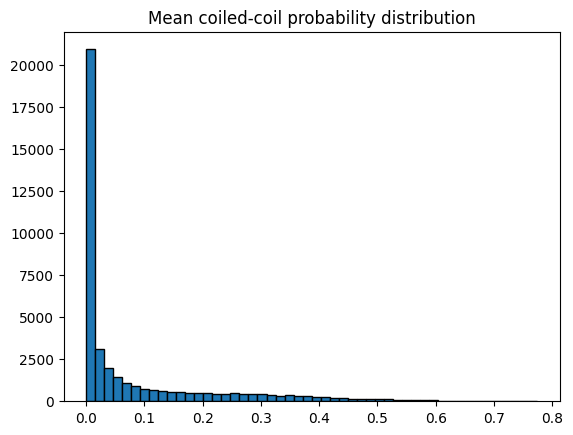

In [ ]:
tmp_df.mean_cc.hist(bins=50, edgecolor='black', grid=False)
plt.title('Mean coiled-coil probability distribution')
plt.show()



In [ ]:
def rolling_average(l, w=100):
    return [np.mean(l[i:i+w]) for i in range(len(l)-w+1)]

In [ ]:
tmp_df['cc_100'] = tmp_df['cc'].apply(lambda x: rolling_average(x))

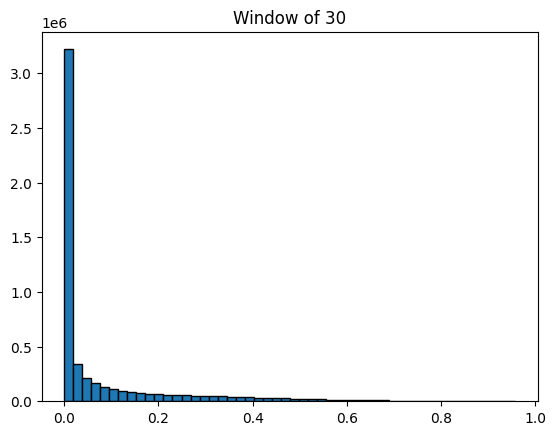

In [ ]:
tmp_df.explode('cc_30')['cc_30'].hist(bins=50, edgecolor='black', grid=False)
plt.title('Window of 30')
plt.show()

# Does not include sequences with length shorter than 30

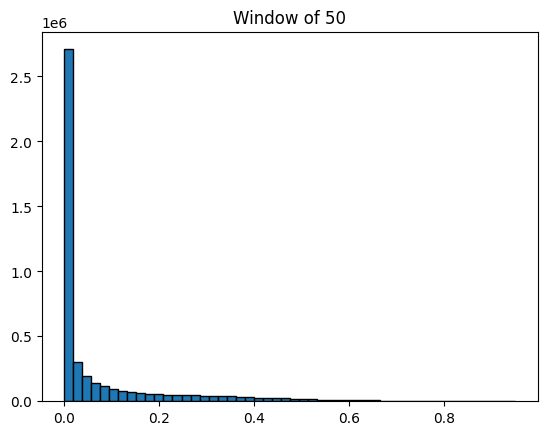

In [ ]:
tmp_df.explode('cc_50')['cc_50'].hist(bins=50, edgecolor='black', grid=False)
plt.title('Window of 50')
plt.show()
# Does not include sequences with length shorter than 50

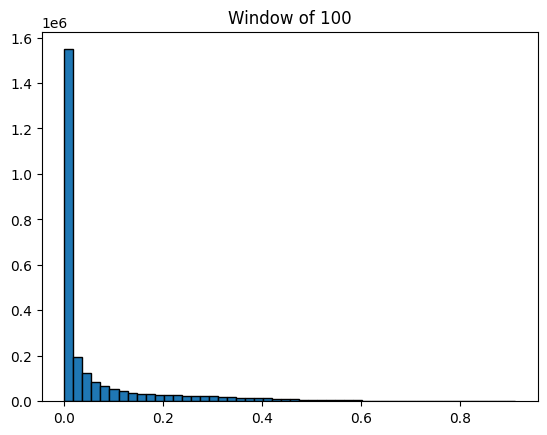

In [ ]:
tmp_df.explode('cc_100')['cc_100'].hist(bins=50, edgecolor='black', grid=False)
plt.title('Window of 100')
plt.show()

# Does not include sequences with length shorter than 100

# CLANS

### Visualize CC propensity for groups

In [ ]:
clans_df = pd.DataFrame(columns=['group_id', 'type', 'hide', 'size', 'color', 'numbers'])

clans_data = '/ebio/abt1_share/prediction_hendecads/0_data/npf_data/seqgroups.txt'  # "/home/enno/uni/SS23/thesis/data/hendecads/seqgroups.txt"

with open(clans_data, 'r') as file:
    data = file.read()

# Split the data by 'name='
group_data = re.split(r'name=', data)[1:]

for group_str in group_data:
    group_lines = group_str.strip().split('\n')
    
    group = {'group_id': group_lines[0], 
             'type': group_lines[1].split('=')[-1], 
             'size': group_lines[2].split('=')[-1],
             'hide': group_lines[3].split('=')[-1],
             'color': group_lines[4].split('=')[-1], 
             'numbers': str(list(map(int, group_lines[5].split('=')[-1].split(';'))))}
    
    clans_df.loc[len(clans_df)] = group

In [ ]:
clans_df

,group_id,type,hide,size,color,numbers
0,group_0,0,0,10,0;196;255;255,"[32770, 6, 32774, 9, 32779, 11, 32780, 32793, ..."
1,group_2,0,0,10,86;255;160;255,"[15360, 3074, 14338, 29189, 10246, 10247, 3021..."
2,group_3,0,0,10,0;212;255;255,"[23553, 17922, 15365, 23561, 9738, 15883, 4111..."
3,group_4,0,0,10,222;0;0;255,"[32258, 13832, 29197, 24083, 22036, 24087, 215..."
4,group_5,0,0,10,160;255;86;255,"[19457, 25089, 19971, 26628, 5127, 32777, 2920..."
...,...,...,...,...,...,...
132,group_1_1,0,0,10,255;215;0;255,"[20, 55, 64, 188, 189, 209, 251, 323, 633, 664..."
133,group_1_2,0,0,10,160;255;86;255,"[26, 35, 44, 73, 91, 96, 97, 128, 152, 177, 18..."
134,group_1_3,0,0,10,0;156;255;255,"[172, 197, 576, 577, 927, 1160, 1332, 1338, 13..."
135,group_1_4,0,0,10,0;64;255;255,"[387, 669, 1050, 1340, 2050, 2203, 2520, 2563,..."


In [ ]:
prots = df.id.unique()
groups = clans_df.group_id.unique()

# assign groups to proteins
for group in groups:
    group_ixs = eval(clans_df[clans_df.group_id == group].numbers.values[0])
    group_prots = df[df.id.isin(prots[group_ixs])]

    df.loc[group_prots.index, 'group'] = group
    
df

,id,seq,stretch_ix,stretch_seq,group
0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,NaN
1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5...",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,NaN
2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,NaN
3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 438, 439, 440, 441, 442, 443, 444, 445, ...",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,group_42
4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 173, 174, 175, 176, 177, 178, 179, 180, ...",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,group_38
...,...,...,...,...,...
40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 668, 669, 670, 671, 672, 673, 674, 675, ...",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...,group_106
40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 579, 580, 581, 582, 583, 584, 585, 586, ...",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...,group_9
40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 7...",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...,NaN
40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 735, 736, 737, 738, 739, 740, 741, 742, ...",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...,group_1_1


### Visualize CC propensity in CLANS map

In [ ]:
clans_data = "/ebio/abt1_share/prediction_hendecads/0_data/npf_data/clans_map/new_hendecads_1E-14.clans"  # '/home/enno/uni/SS23/thesis/data/hendecads/new_hendecads_1E-14.clans'  

with open(clans_data, 'r') as file:
    data = file.readlines()

data = [line.strip() for line in data]

In [ ]:
first_pos = 73772
last_pos = 73772 + 36455

pos = [x.split() for x in data[first_pos:last_pos]]

pos_df = pd.DataFrame(pos, columns=['id', 'x', 'y', '_'])

In [ ]:
pos_df['id'] = df.id.unique()
pos_df

,prot_id,x,y,_
0,MCD6041253.1,-567.3885,34.03027,0.0
1,MCD7737945.1,313.18863,-218.57608,0.0
2,MYF28459.1,535.7912,-22.468689,0.0
3,WP_168920948.1,-346.2722,104.598206,0.0
4,WP_026306873.1,164.44267,341.07828,0.0
...,...,...,...,...
36450,XP_034013580.1,338.92377,259.0848,0.0
36451,GFR06050.1,197.85645,-160.68378,0.0
36452,KAG2190414.1,-16.011114,-493.57257,0.0
36453,MBY0528383.1,249.41255,166.48827,0.0


In [ ]:
tmp_pos_df = pos_df[~pos_df.id.isin(prob_sid)]

In [ ]:
tmp_pos_df['mean_cc'] = tmp_df[~tmp_df.sid.isin(prob_sid)].groupby('id').mean()['mean_cc'].values

/ebio/abt1_share/prediction_hendecads/conda/miniconda3/envs/deepCoil/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
tmp_pos_df

,prot_id,x,y,_,avg_cc
0,MCD6041253.1,-567.388500,34.030270,0.0,0.001657
1,MCD7737945.1,313.188630,-218.576080,0.0,0.395283
2,MYF28459.1,535.791200,-22.468689,0.0,0.035445
3,WP_168920948.1,-346.272200,104.598206,0.0,0.002328
4,WP_026306873.1,164.442670,341.078280,0.0,0.002975
...,...,...,...,...,...
36450,XP_034013580.1,338.923770,259.084800,0.0,0.000031
36451,GFR06050.1,197.856450,-160.683780,0.0,0.034435
36452,KAG2190414.1,-16.011114,-493.572570,0.0,0.005394
36453,MBY0528383.1,249.412550,166.488270,0.0,0.507309


/ebio/abt1_share/prediction_hendecads/conda/miniconda3/envs/deepCoil/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


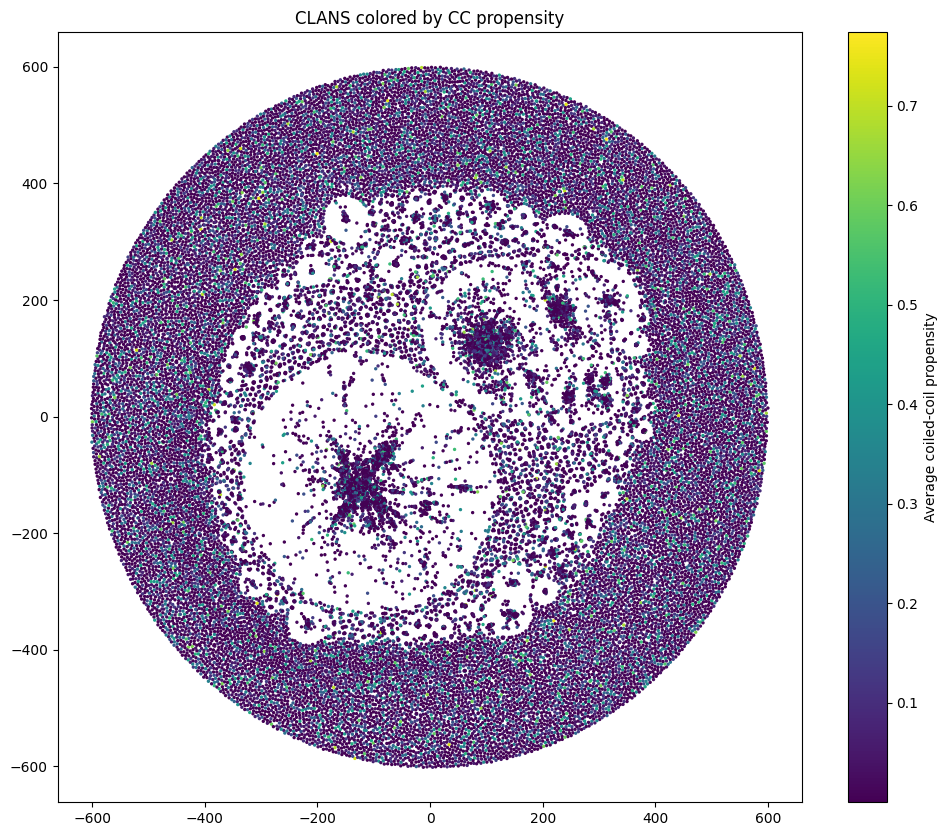

In [ ]:
# Scatter plot of the proteins in the CLANS plot
tmp_pos_df.x = tmp_pos_df.x.astype(float)
tmp_pos_df.y = tmp_pos_df.y.astype(float)


plt.figure(figsize=(12, 10))
plt.scatter(tmp_pos_df.x, tmp_pos_df.y, c=tmp_pos_df.avg_cc, cmap='viridis', s=2)
plt.colorbar(label='Average coiled-coil propensity')
plt.title('CLANS colored by CC propensity')
plt.show()
